In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CAETomo.alignment import slice_viewer, tilt_series_alignment

In [ ]:
from tkinter import Tk
import tkinter.filedialog as tkf
root = Tk()
root.attributes('-topmost', True)  # Display the dialog in the foreground.
root.iconify()

ref_adr = tkf.askopenfilename() # Reference tilt series to align, e.g., ADF-STEM tilt series
print(ref_adr)

child_adr = None

In [ ]:
child_adr = tkf.askopenfilenames() # Additional tilt series to align, e.g., feature map tilt series
print(*child_adr, sep="\n")

In [4]:
angles_deg = np.linspace(-70, 40, 12)
print(angles_deg)

angles = angles_deg * np.pi / 180

[-70. -60. -50. -40. -30. -20. -10.   0.  10.  20.  30.  40.]


In [5]:
align = tilt_series_alignment(ref_adr, angles, img_adr=child_adr)

In [ ]:
%matplotlib widget
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

tracker = slice_viewer(ax, align.data)

fig.canvas.mpl_connect("key_press_event", tracker.on_press)
fig.tight_layout()
plt.show()

In [6]:
align.prepare_alignment(pad=20)

interactive(children=(IntSlider(value=6, description='tilt', max=10, min=1, style=SliderStyle(description_widt…

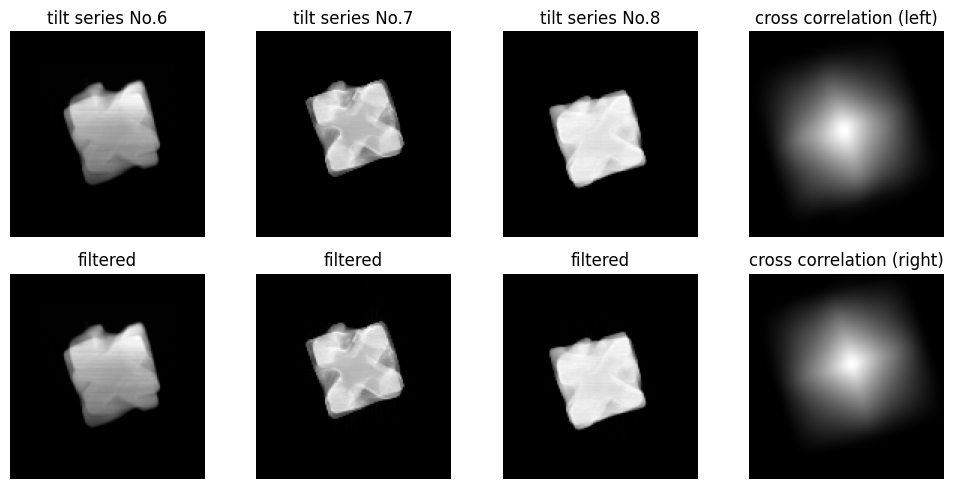

In [13]:
%matplotlib widget
align.filter_adjust()

0 0 137 130
False False
False
0
0.0
False
5
0
False


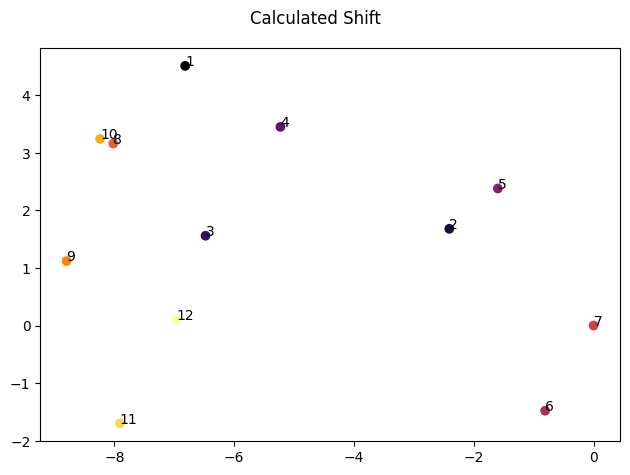

In [9]:
%matplotlib inline
align.calculate_shift()

In [10]:
align.apply_alignment()

In [ ]:
# Check the alignment result
%matplotlib widget
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

tracker = slice_viewer(ax, align.aligned_p)

fig.canvas.mpl_connect("key_press_event", tracker.on_press)
fig.tight_layout()
plt.show()

In [ ]:
# Save the result
align.save_result()

In [ ]:
# Able to align multiple times and save the result
%matplotlib widget
align.repeat()

In [ ]:
%matplotlib inline
align.calculate_shift()

In [ ]:
align.apply_alignment()

In [ ]:
align.save_result()